# 폰트 이미지 처리


In [27]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm

font_path = "/Users/hyorimlee/Documents/GitHub/neural_network/Fonts/"
fonts = os.listdir("/Users/hyorimlee/Documents/GitHub/neural_network/Fonts/")


while len(fonts) > 3:
    fonts.pop() 
    
    
print(fonts)


['NanumPen.ttf', 'NanumMyeongjo.ttf', 'NanumSquareR.ttf']


In [28]:
co = "0 1 2 3 4 5 6 7 8 9 A B C D E F"
start = "AC00"
end = "D7A3"

co = co.split(" ")

Hangul_Syllables = [a+b+c+d 
                    for a in co 
                    for b in co 
                    for c in co 
                    for d in co]

Hangul_Syllables = np.array(Hangul_Syllables)

s = np.where(start == Hangul_Syllables)[0][0]
e = np.where(end == Hangul_Syllables)[0][0]

Hangul_Syllables = Hangul_Syllables[s : e + 1]


In [ ]:
unicodeChars = chr(int(Hangul_Syllables[0], 16))
plt.figure(figsize=(15, 15))

for idx, ttf in enumerate(fonts):
    print(font_path)
    print(ttf)
    font = ImageFont.truetype(font = font_path + ttf, size = 100)
    
    x, y = font.getsize(unicodeChars)

    theImage = Image.new('RGB', (x + 3, y + 3), color='white')

    theDrawPad = ImageDraw.Draw(theImage)

    theDrawPad.text((0, 0), unicodeChars[0], font=font, fill='black')

    plt.subplot("24{}".format(str(idx + 1)))
    
    plt.title(str(ttf))
    
    plt.imshow(theImage)
    
plt.show()


/Users/hyorimlee/Documents/GitHub/neural_network/Fonts/
NanumPen.ttf
/Users/hyorimlee/Documents/GitHub/neural_network/Fonts/
NanumMyeongjo.ttf
/Users/hyorimlee/Documents/GitHub/neural_network/Fonts/
NanumSquareR.ttf


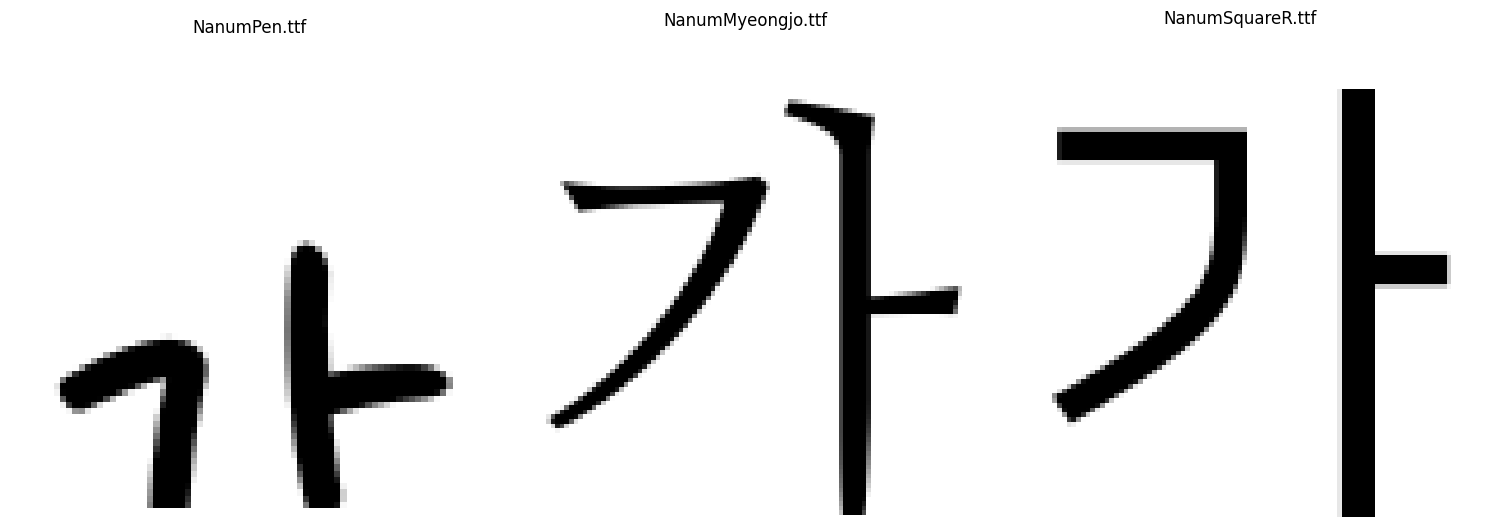

In [ ]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm

# 폰트 파일 경로 및 읽기
font_path = "/Users/hyorimlee/Documents/GitHub/neural_network/Fonts/"
fonts = os.listdir(font_path)

# 테스트를 위해 최대 3개의 폰트만 사용
font=fonts[0]

# 한글 유니코드 범위 생성
co = "0 1 2 3 4 5 6 7 8 9 A B C D E F"
start = "AC00"
end = "D7A3"

co = co.split(" ")

Hangul_Syllables = [a + b + c + d for a in co for b in co for c in co for d in co]
Hangul_Syllables = np.array(Hangul_Syllables)

# 시작 및 종료 범위 설정
s = np.where(Hangul_Syllables == start)[0][0]
e = np.where(Hangul_Syllables == end)[0][0]

Hangul_Syllables = Hangul_Syllables[s: e + 1]

# 첫 번째 문자 선택
unicode_char = chr(int(Hangul_Syllables[0], 16))

# 시각화
plt.figure(figsize=(15, 15))

for idx, ttf in enumerate(fonts):
    print(font_path)
    print(ttf)
    
    # 폰트 로드
    font = ImageFont.truetype(font=font_path + ttf, size=100)
    
    # getbbox로 텍스트 크기 계산
    bbox = font.getbbox(unicode_char)
    width, height = bbox[2] - bbox[0], bbox[3] - bbox[1]

    # 이미지 생성
    the_image = Image.new('RGB', (width + 10, height + 10), color='white')
    draw_pad = ImageDraw.Draw(the_image)

    # 텍스트 그리기
    draw_pad.text((5, 5), unicode_char, font=font, fill='black')

    # 서브플롯에 표시
    plt.subplot(1, len(fonts), idx + 1)
    plt.title(str(ttf))
    plt.imshow(the_image)
    plt.axis('off')

plt.tight_layout()
plt.show()


# '가' 글씨 변환 성공 코드

In [32]:
import os
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# 폰트 파일 경로 및 읽기
font_path = "/Users/hyorimlee/Documents/GitHub/neural_network/Fonts/"
fonts = os.listdir(font_path)

# 저장 경로 설정
output_path = "/Users/hyorimlee/Documents/GitHub/neural_network/Image/"
os.makedirs(output_path, exist_ok=True)

# 한글 유니코드 범위 생성
co = "0 1 2 3 4 5 6 7 8 9 A B C D E F"
start = "AC00"
end = "D7A3"

co = co.split(" ")

Hangul_Syllables = [a + b + c + d for a in co for b in co for c in co for d in co]
Hangul_Syllables = np.array(Hangul_Syllables)

# 시작 및 종료 범위 설정
s = np.where(Hangul_Syllables == start)[0][0]
e = np.where(Hangul_Syllables == end)[0][0]

Hangul_Syllables = Hangul_Syllables[s: e + 1]

# 저장할 이미지 크기
image_size = (64, 64)

# 폴더 생성 및 데이터 저장
for ttf in fonts:
    font_folder = os.path.join(output_path, os.path.splitext(ttf)[0])
    os.makedirs(font_folder, exist_ok=True)
    
    # 폰트 로드
    font = ImageFont.truetype(font=font_path + ttf, size=48)  # 크기를 약간 작게 설정
    
    for idx, unicode_value in enumerate(Hangul_Syllables):
        unicode_char = chr(int(unicode_value, 16))
        
        # 64x64 크기 이미지 생성
        the_image = Image.new('L', image_size, color='white')  # 흰 배경, 회색조 이미지
        draw_pad = ImageDraw.Draw(the_image)
        
        # 텍스트 크기 계산 및 중앙 배치
        bbox = font.getbbox(unicode_char)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        x_offset = (image_size[0] - text_width) // 2
        y_offset = (image_size[1] - text_height) // 2
        
        # 텍스트 그리기
        draw_pad.text((x_offset, y_offset), unicode_char, font=font, fill='black')
        
        # 파일 저장
        file_name = f"{unicode_value}.png"
        file_path = os.path.join(font_folder, file_name)
        the_image.save(file_path, format="PNG")
        
        # 제한된 샘플만 테스트
        if idx >= 10:  # 10개 샘플만 저장 (테스트용)
            break

print(f"Images saved to {output_path}")


Images saved to /Users/hyorimlee/Documents/GitHub/neural_network/Image/


# 폰트 이미지로 변경 성공 코드

In [2]:
import os
from PIL import Image, ImageDraw, ImageFont

# 설정
font_path = "/Users/hyorimlee/Documents/GitHub/neural_network/Fonts/"
fonts = [f for f in os.listdir(font_path) if not f.startswith(".")]  # 숨김 파일 제외
output_path = "/Users/hyorimlee/Documents/GitHub/neural_network/Image/"
os.makedirs(output_path, exist_ok=True)

# 데이터셋 파일 읽기
dataset_file = "/Users/hyorimlee/Documents/GitHub/neural_network/dataset.txt"
with open(dataset_file, "r", encoding="utf-8") as file:
    characters = file.read().replace("\n", "").replace(" ", "")  # 공백 및 줄바꿈 제거

# 이미지 크기 설정
image_size = (64, 64)

# 모든 폰트를 순회하며 처리
for ttf in fonts:
    font_folder = os.path.join(output_path, os.path.splitext(ttf)[0])
    os.makedirs(font_folder, exist_ok=True)
    
    # 폰트 로드
    font = ImageFont.truetype(font=font_path + ttf, size=48)  # 적절한 크기로 설정
    
    for char in characters:
        # 비트맵 이미지 생성 (1비트 모드)
        the_image = Image.new('1', image_size, color=1)  # 흰 배경 (1은 흰색)
        draw_pad = ImageDraw.Draw(the_image)
        
        # 텍스트 크기 계산 및 중앙 배치
        bbox = font.getbbox(char)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        x_offset = (image_size[0] - text_width) // 2
        y_offset = (image_size[1] - text_height) // 2
        
        # 텍스트 그리기
        draw_pad.text((x_offset, y_offset), char, font=font, fill=0)  # 검정 텍스트 (0은 검정색)
        
        # 파일 저장
        file_name = f"{ord(char):04X}.bmp"  # 유니코드 값을 16진수로 변환해 파일 이름 설정
        file_path = os.path.join(font_folder, file_name)
        the_image.save(file_path, format="BMP")

print(f"Bitmap images saved in {output_path}")


Bitmap images saved in /Users/hyorimlee/Documents/GitHub/neural_network/Image/


# 폰트 폴더마다 제대로 이미지 들어갔는지 개수 확인하는 코드
### 총 154글자 들어가야함

In [4]:
import os

# 폴더 경로 설정
folder_path = "/Users/hyorimlee/Documents/GitHub/neural_network/Image/MaruBuri-Bold"

# 파일 개수 세기
for subdir, dirs, files in os.walk(folder_path):
    folder_name = os.path.basename(subdir)  # 현재 폴더 이름
    file_count = len(files)  # 현재 폴더 내 파일 개수
    print(f"Folder '{folder_name}' contains {file_count} file(s).")


Folder 'MaruBuri-Bold' contains 154 file(s).


# 64*64 bmp 파일로 만드는 코드

In [5]:
import os
from PIL import Image, ImageDraw, ImageFont

# 설정
font_path = "/Users/hyorimlee/Documents/GitHub/neural_network/Fonts/"
fonts = [f for f in os.listdir(font_path) if not f.startswith(".")]  # 숨김 파일 제외
output_path = "/Users/hyorimlee/Documents/GitHub/neural_network/Image/"
os.makedirs(output_path, exist_ok=True)

# 데이터셋 파일 읽기
dataset_file = "/Users/hyorimlee/Documents/GitHub/neural_network/dataset.txt"
with open(dataset_file, "r", encoding="utf-8") as file:
    characters = file.read().replace("\n", "").replace(" ", "")  # 공백 및 줄바꿈 제거

# 이미지 크기 설정
image_size = (64, 64)

# 모든 폰트를 순회하며 처리
for ttf in fonts:
    font_folder = os.path.join(output_path, os.path.splitext(ttf)[0])
    os.makedirs(font_folder, exist_ok=True)
    
    # 폰트 로드
    font = ImageFont.truetype(font=font_path + ttf, size=48)  # 적절한 크기로 설정
    
    for char in characters:
        # 비트맵 이미지 생성 (1비트 모드)
        the_image = Image.new('1', image_size, color=1)  # 흰 배경 (1은 흰색)
        draw_pad = ImageDraw.Draw(the_image)
        
        # 텍스트 크기 계산 및 중앙 배치
        bbox = font.getbbox(char)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        x_offset = max((image_size[0] - text_width) // 2, 0)
        y_offset = max((image_size[1] - text_height) // 2, 0)
        
        # 텍스트 그리기
        draw_pad.text((x_offset, y_offset), char, font=font, fill=0)  # 검정 텍스트 (0은 검정색)
        
        # 파일 저장
        file_name = f"{ord(char):04X}.bmp"  # 유니코드 값을 16진수로 변환해 파일 이름 설정
        file_path = os.path.join(font_folder, file_name)
        the_image.save(file_path, format="BMP")

print(f"Bitmap images saved in {output_path}")


Bitmap images saved in /Users/hyorimlee/Documents/GitHub/neural_network/Image/
